In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

! mkdir ~/.kaggle

! cp /content/drive/MyDrive/kaggle.json /root/.kaggle

! chmod 600 /root/.kaggle/kaggle.json

! kaggle datasets download -d paultimothymooney/breast-histopathology-images

! unzip breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [ ]:
! pip install tensorflow-probability

# to generate gifs
! pip install imageio
! pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-s47a_ies
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-s47a_ies
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184397 sha256=e263cfc3b38ce52dffc25c6d01e00add048c4532033dda7e4f78a9f55617f78f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dczech06/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [ ]:
from glob import glob
data = glob('IDC_regular_ps50_idx5/**/*.png', recursive = True)
data_0 = glob('IDC_regular_ps50_idx5/*/0/*.png', recursive = True)
data_1 = glob('IDC_regular_ps50_idx5/*/1/*.png', recursive = True)

In [ ]:
img_size = 64
num_channels = 1

In [ ]:
import random

def randomSamples(imageData):
    lst = list()
    while(len(lst) != 25000):
        a = random.choice(imageData)

        if a not in lst:
            lst.append(a)

    return lst

In [ ]:
import cv2
import matplotlib.pyplot as plt

images_original = list()
labels = list()
newData = list()

newData = randomSamples(data)

for i in newData:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.imread(i)
        img_1 = cv2.resize(img, (img_size, img_size))
        images_original.append(img_1)
        labels.append(label)

In [ ]:
import tensorflow as tf

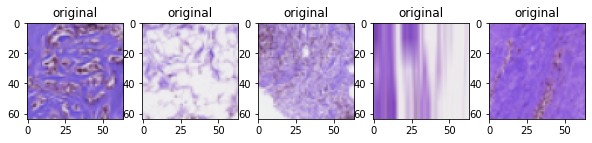

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(images_original[i]))
    plt.gray()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

images = list()
labels = list()
newData = list()

# newData = randomSamples(data)
newData_0 = randomSamples(data_0)
newData_1 = randomSamples(data_1)

for i in newData_0:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)
        labels.append(label)

for i in newData_1:
    if i.endswith('.png'):
        label = i[-5]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)
        img_1 = cv2.resize(img, (img_size, img_size))
        images.append(img_1)
        labels.append(label)

In [ ]:
images_array = np.array(images)

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images_array, y, random_state = 0, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 0, test_size = 0.3)

In [ ]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], img_size, img_size, num_channels)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(x_train)
test_images = preprocess_images(x_test)
val_images = preprocess_images(x_val)

In [ ]:
train_images.shape, test_images.shape, val_images.shape

((28000, 64, 64, 1), (10000, 64, 64, 1), (12000, 64, 64, 1))

In [ ]:
type(train_images), type(val_images), type(test_images)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

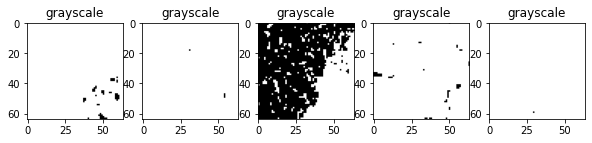

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("grayscale")
    plt.imshow(tf.squeeze(test_images[i]))
    plt.gray()
plt.show()

In [ ]:
train_size = train_images.shape[0]
batch_size = 32
test_size = test_images.shape[0]
val_size = val_images.shape[0]

In [ ]:
import tensorflow as tf

In [ ]:
# Shuffling the data

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images).
             shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images).
                shuffle(test_size).batch(batch_size))
val_dataset = (tf.data.Dataset.from_tensor_slices(val_images).
              shuffle(val_size).batch(batch_size))

In [ ]:
type(train_dataset), type(val_dataset), type(test_dataset)

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.BatchDataset)

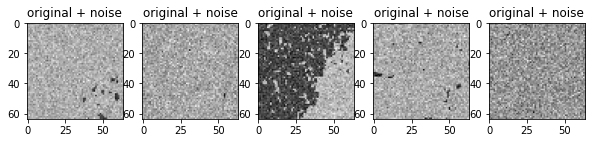

In [ ]:
noise_factor = 0.2

train_images_noisy = train_images + noise_factor * tf.random.normal(shape = train_images.shape)
test_images_noisy = test_images + noise_factor * tf.random.normal(shape = test_images.shape)
val_images_noisy = val_images + noise_factor * tf.random.normal(shape = val_images.shape)

train_images_noisy_1 = tf.clip_by_value(train_images_noisy, clip_value_min = 0., clip_value_max = 1.)
test_images_noisy_1 = tf.clip_by_value(test_images_noisy, clip_value_min = 0., clip_value_max = 1.)
val_images_noisy_1 = tf.clip_by_value(val_images_noisy, clip_value_min = 0., clip_value_max = 1.)

n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
plt.show()

# Building VAE

In [ ]:
import tensorflow_probability as tfp
import time
import imageio
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
latent_dim = 5

In [ ]:
class Sampling(layers.Layer):
  def call(self, inputs):
    mean, logvar = inputs
    batch = tf.shape(mean)[0]
    dim = tf.shape(mean)[1]
    eps = keras.backend.random_normal(shape = (batch, dim))

    return mean + tf.exp(0.5 * logvar) * eps

In [ ]:
# Encoder

input_layer = keras.Input(shape = (img_size, img_size, 1))
x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, 
                  activation = 'relu', padding = 'same')(input_layer)
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2,
                   activation = 'relu', padding = 'same')(x)
flatten_layer = layers.Flatten()(x)
encoder_output = layers.Dense(latent_dim + latent_dim, 
                              activation = 'relu')(flatten_layer)
mean = layers.Dense(latent_dim)(encoder_output)
logvar = layers.Dense(latent_dim)(encoder_output)
z = Sampling()([mean, logvar])
encoder = keras.Model(input_layer, [mean, logvar, z], name = 'encoder')

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 16, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 16384)        0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
# Decoder
decoder = keras.Sequential()
decoder.add(keras.Input(shape = (latent_dim,)))
decoder.add(layers.Dense(units = 16 * 16 * 64, activation = tf.nn.relu))
decoder.add(layers.Reshape(target_shape = (16, 16, 64)))
decoder.add(layers.Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2,
                           padding = 'same', activation = 'relu'))
decoder.add(layers.Conv2DTranspose(filters = 32, kernel_size = 3, strides = 2,
                           padding = 'same', activation = 'relu'))
decoder.add(layers.Conv2DTranspose(filters = 1, kernel_size = 3, 
                                        strides = 1, padding = 'same', 
                                        activation = 'sigmoid'))
  
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16384)             98304     
                                                                 
 reshape (Reshape)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 1)        289       
 ranspose)                                                       
                                                      

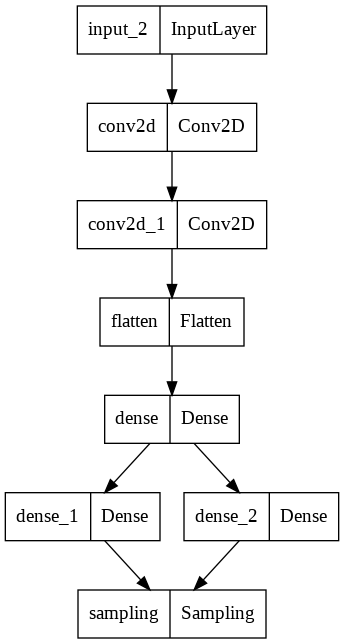

In [ ]:
tf.keras.utils.plot_model(encoder)

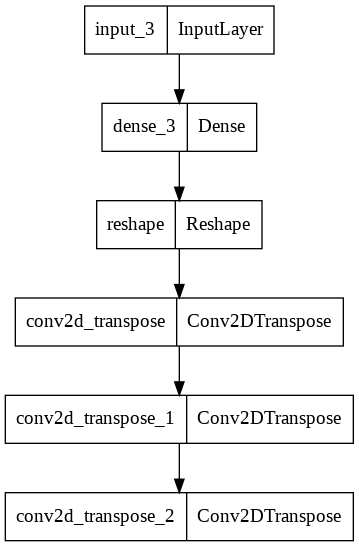

In [ ]:
tf.keras.utils.plot_model(decoder)

In [ ]:
class VAE(keras.Model):
  def __init__(self, encoder, decoder, **kwargs):
    super(VAE, self).__init__(**kwargs)
    self.encoder = encoder
    self.decoder = decoder
    self.total_loss_tracker = keras.metrics.Mean(name = 'total_loss')
    self.reconstruction_loss_tracker = keras.metrics.Mean(
      name="reconstruction_loss"
    )
    self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

  @property
  def metrics(self):
    return [
        self.total_loss_tracker,
        self.reconstruction_loss_tracker, 
        self.kl_loss_tracker,
    ]

  def train_step(self, data):
    with tf.GradientTape() as tape:
      mean, logvar, z = self.encoder(data)
      reconstruction = self.decoder(z)
      reconstruction_loss = tf.reduce_mean(
          tf.reduce_sum(
              keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
          )
        )
      kl_loss = -0.5 * (1 + logvar - tf.square(mean) - tf.exp(logvar))
      kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis = 1))
      total_loss = reconstruction_loss + kl_loss
    grads = tape.gradient(total_loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    self.total_loss_tracker.update_state(total_loss)
    self.reconstruction_loss_tracker.update_state(reconstruction_loss)
    self.kl_loss_tracker.update_state(kl_loss)
    
    return {
      "loss": self.total_loss_tracker.result(),
      "reconstruction_loss": self.reconstruction_loss_tracker.result(),
      "kl_loss": self.kl_loss_tracker.result(),
    }

In [ ]:
train_val_images = np.concatenate([train_images, val_images], axis = 0)
train_val_images = np.expand_dims(train_val_images, -1).astype('float32') / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer = keras.optimizers.Adam(1e-4))
vae.fit(train_images, epochs = 30, batch_size = 32)

Epoch 1/30
875/875 [==============================] - 18s 9ms/step - loss: 1667.2185 - reconstruction_loss: 1317.2046 - kl_loss: 26.9836
Epoch 2/30
875/875 [==============================] - 8s 9ms/step - loss: 1192.6675 - reconstruction_loss: 1169.3800 - kl_loss: 10.9006
Epoch 3/30
875/875 [==============================] - 8s 9ms/step - loss: 1175.0912 - reconstruction_loss: 1154.5920 - kl_loss: 9.8769
Epoch 4/30
875/875 [==============================] - 8s 9ms/step - loss: 1148.8717 - reconstruction_loss: 1134.9438 - kl_loss: 10.5547
Epoch 5/30
875/875 [==============================] - 9s 10ms/step - loss: 1143.5388 - reconstruction_loss: 1117.2136 - kl_loss: 10.7335
Epoch 6/30
875/875 [==============================] - 8s 9ms/step - loss: 1100.9767 - reconstruction_loss: 1079.9952 - kl_loss: 11.1738
Epoch 7/30
875/875 [==============================] - 9s 10ms/step - loss: 1087.0553 - reconstruction_loss: 1073.6188 - kl_loss: 11.2880
Epoch 8/30
875/875 [==========================

In [ ]:
@tf.function
def sample(eps = None):
  if eps is None:
    eps = tf.random.normal(shape = (100, latent_dim))
  return decode(eps, apply_sigmoid = True)

def encode(x):
  mean, logvar = tf.split(encoder(x), num_of_size_splits = 2, axis = 1)
  return mean, logvar

def reparameterize(mean, logvar):
  eps = tf.random.normal(shape = mean.shape)
  return eps * tf.exp(logvar * .5) + mean

def decode(z, apply_sigmoid = False):
  logits = decoder(z)

  if apply_sigmoid:
    probs = tf.sigmoid(logits)
    return probs
  
  return logits

In [ ]:
# Loss function and optimizer

opt = keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis = 1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis = raxis
  )

def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits = x_logit, 
                                                      labels = x)
  logpx_z = -tf.reduce_sum(cross_ent, axis = [1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)

  return -tf.reduce_mean(logpx_z + logpz - logqz_x)

In [ ]:
class VAE_1(keras.Model):
  def __init__(self, encoder, decoder, **kwargs):
    super(VAE, self).__init__()
    self.encoder = encoder
    self.decoder = decoder

  def train_step(self, data):
    mean, logvar = encode(data)
    z = reparameterize(mean, logvar)
    predictions = sample(z)

    with tf.GradientTape() as tape:
      loss = compute_loss(model, data)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [ ]:
vae = VAE_1(encoder, decoder)
vae.compile(optimizer = opt)
vae.fit(train_images, train_images, epochs = 30, batch_size = 32,
        validation_data = (val_images, val_images))

TypeError: ignored

In [ ]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(img_size, img_size, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=2, activation='relu', padding = 'same'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=2, activation='relu', padding = 'same'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=16*16*64, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(16, 16, 64)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [ ]:
# Loss function and optimizer

optimizer = keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis = 1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis = raxis
  )

def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits = x_logit, labels = x)
  logpx_z = -tf.reduce_sum(cross_ent, axis = [1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
  """
  Executes one training step and returns the loss.
  This function copmutes the loss and gradients, and uses the latter to
  update the model's paramerters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [ ]:
# Training

epochs = 50

# Set the dimensionality of the latent space to a plane for visualization
latent_dim = 5
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape = [num_examples_to_generate, latent_dim]
)
model = CVAE(latent_dim)

In [ ]:
model.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 10)                163850    
                                                                 
Total params: 182,666
Trainable params: 182,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16384)             98304     
                                                                 
 reshape (Reshape)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 1)        289       
 ranspose)                                                       
                                                      

In [ ]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize = (4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap = 'gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# Pick a sample of hte test set for generating output images

assert batch_size >= num_examples_to_generate

for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

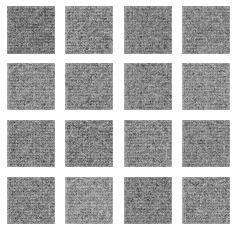

Epoch: 1, Test set ELBO: -1044.599609375, time elapse for current epoch: 8.495655536651611


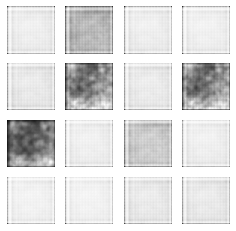

Epoch: 2, Test set ELBO: -988.0302124023438, time elapse for current epoch: 6.1934425830841064


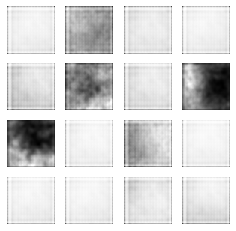

Epoch: 3, Test set ELBO: -934.7005615234375, time elapse for current epoch: 5.982553720474243


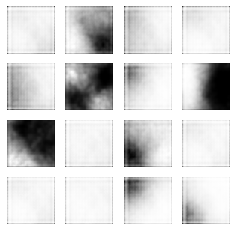

Epoch: 4, Test set ELBO: -923.2465209960938, time elapse for current epoch: 6.03022837638855


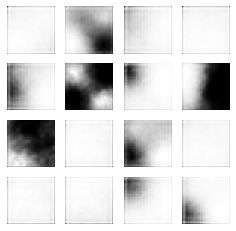

Epoch: 5, Test set ELBO: -920.1199951171875, time elapse for current epoch: 6.091230154037476


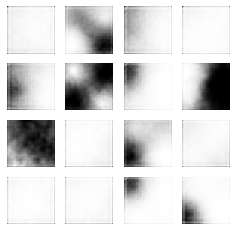

Epoch: 6, Test set ELBO: -915.2213745117188, time elapse for current epoch: 6.1441590785980225


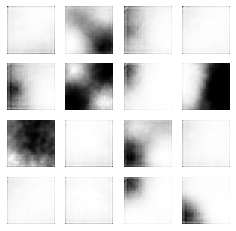

Epoch: 7, Test set ELBO: -913.5220947265625, time elapse for current epoch: 6.214252710342407


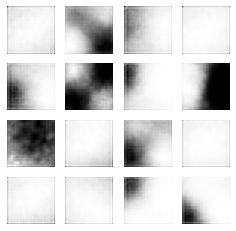

Epoch: 8, Test set ELBO: -907.412841796875, time elapse for current epoch: 10.49062705039978


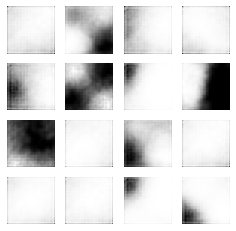

Epoch: 9, Test set ELBO: -902.4364624023438, time elapse for current epoch: 6.31668758392334


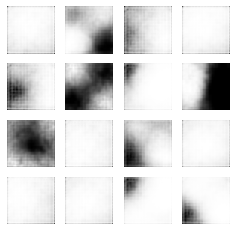

Epoch: 10, Test set ELBO: -897.1260375976562, time elapse for current epoch: 6.390159606933594


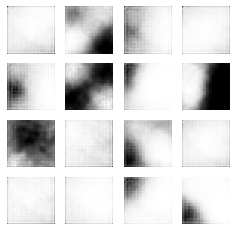

Epoch: 11, Test set ELBO: -892.0879516601562, time elapse for current epoch: 6.465241432189941


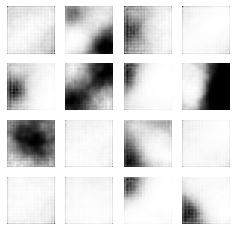

Epoch: 12, Test set ELBO: -890.0126953125, time elapse for current epoch: 6.518755912780762


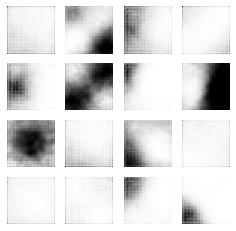

Epoch: 13, Test set ELBO: -888.4189453125, time elapse for current epoch: 6.488038063049316


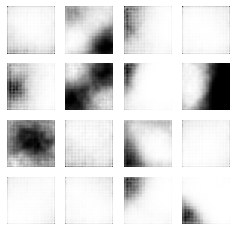

Epoch: 14, Test set ELBO: -881.8776245117188, time elapse for current epoch: 6.435393810272217


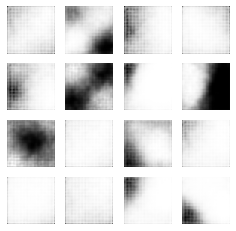

Epoch: 15, Test set ELBO: -858.471923828125, time elapse for current epoch: 6.419094562530518


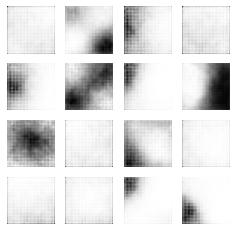

Epoch: 16, Test set ELBO: -855.6223754882812, time elapse for current epoch: 6.393216609954834


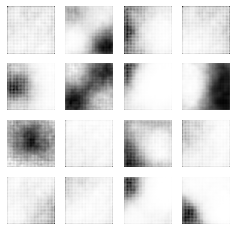

Epoch: 17, Test set ELBO: -854.300048828125, time elapse for current epoch: 10.482516288757324


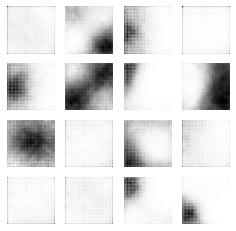

Epoch: 18, Test set ELBO: -852.5656127929688, time elapse for current epoch: 6.3719823360443115


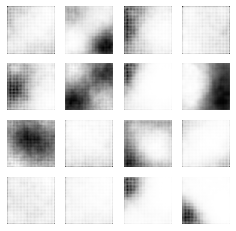

Epoch: 19, Test set ELBO: -852.7803955078125, time elapse for current epoch: 6.434778928756714


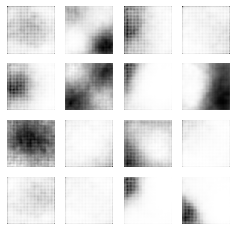

Epoch: 20, Test set ELBO: -851.9497680664062, time elapse for current epoch: 6.5110273361206055


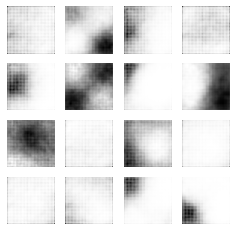

Epoch: 21, Test set ELBO: -852.3840942382812, time elapse for current epoch: 6.526954650878906


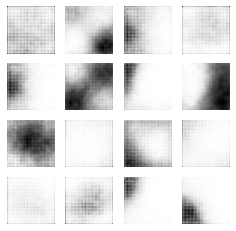

Epoch: 22, Test set ELBO: -851.4093017578125, time elapse for current epoch: 6.464447736740112


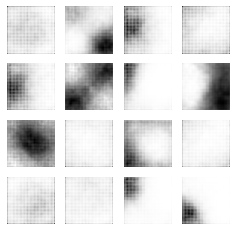

Epoch: 23, Test set ELBO: -853.6724243164062, time elapse for current epoch: 6.46705436706543


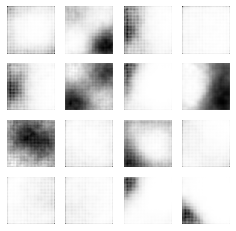

Epoch: 24, Test set ELBO: -851.5005493164062, time elapse for current epoch: 6.435406446456909


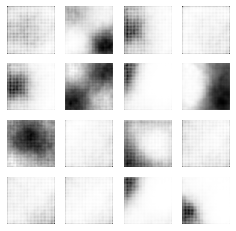

Epoch: 25, Test set ELBO: -851.3604125976562, time elapse for current epoch: 6.403208494186401


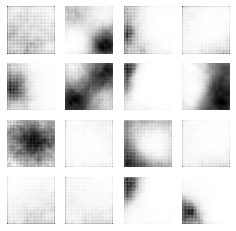

Epoch: 26, Test set ELBO: -850.21484375, time elapse for current epoch: 6.408473014831543


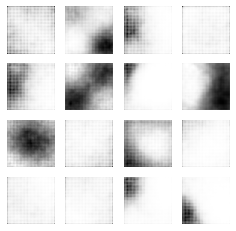

Epoch: 27, Test set ELBO: -850.1525268554688, time elapse for current epoch: 6.40952205657959


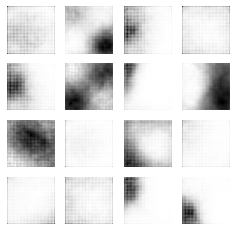

Epoch: 28, Test set ELBO: -850.7315673828125, time elapse for current epoch: 6.427744626998901


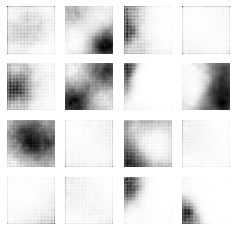

Epoch: 29, Test set ELBO: -850.2348022460938, time elapse for current epoch: 6.4389588832855225


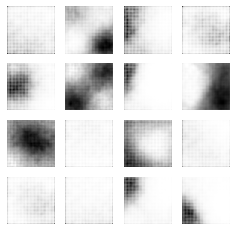

Epoch: 30, Test set ELBO: -851.2484130859375, time elapse for current epoch: 6.469334840774536


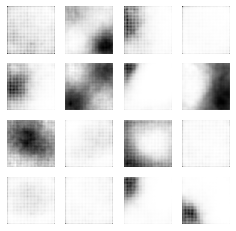

Epoch: 31, Test set ELBO: -849.9676513671875, time elapse for current epoch: 6.466722011566162


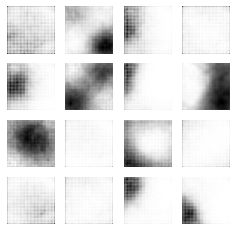

Epoch: 32, Test set ELBO: -850.0908813476562, time elapse for current epoch: 6.441365480422974


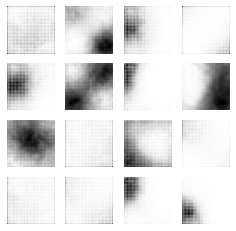

Epoch: 33, Test set ELBO: -849.6939697265625, time elapse for current epoch: 6.442331314086914


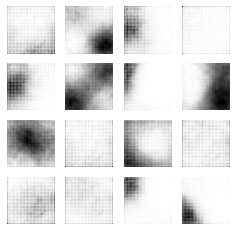

Epoch: 34, Test set ELBO: -849.9771728515625, time elapse for current epoch: 6.433937072753906


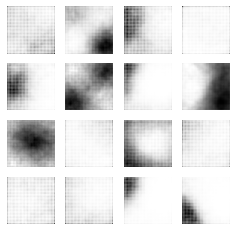

Epoch: 35, Test set ELBO: -850.16259765625, time elapse for current epoch: 6.43181037902832


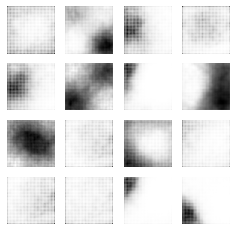

Epoch: 36, Test set ELBO: -850.9280395507812, time elapse for current epoch: 6.444459915161133


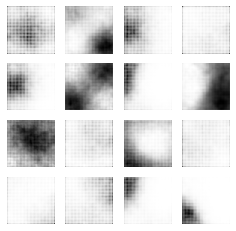

Epoch: 37, Test set ELBO: -848.5626831054688, time elapse for current epoch: 6.44309139251709


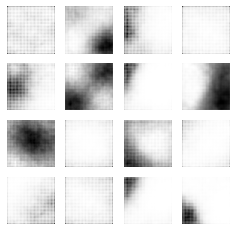

Epoch: 38, Test set ELBO: -850.4331665039062, time elapse for current epoch: 6.439529657363892


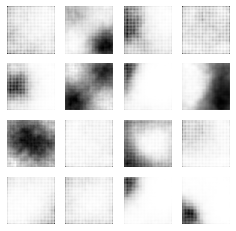

Epoch: 39, Test set ELBO: -848.9901123046875, time elapse for current epoch: 6.446376085281372


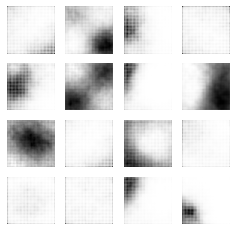

Epoch: 40, Test set ELBO: -848.4403686523438, time elapse for current epoch: 6.44094705581665


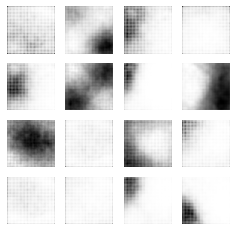

Epoch: 41, Test set ELBO: -849.2239990234375, time elapse for current epoch: 6.4512622356414795


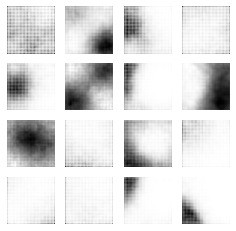

Epoch: 42, Test set ELBO: -850.1591796875, time elapse for current epoch: 6.4488630294799805


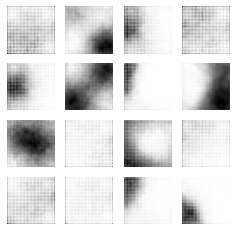

Epoch: 43, Test set ELBO: -850.0010986328125, time elapse for current epoch: 6.436594247817993


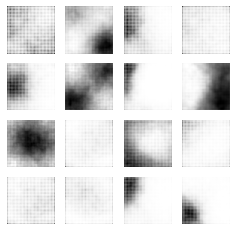

Epoch: 44, Test set ELBO: -851.94482421875, time elapse for current epoch: 6.436936616897583


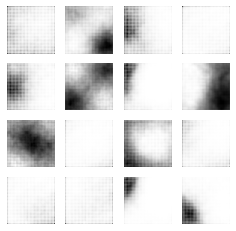

Epoch: 45, Test set ELBO: -849.5036010742188, time elapse for current epoch: 6.462366342544556


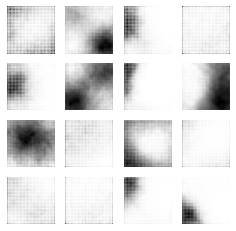

Epoch: 46, Test set ELBO: -848.6708984375, time elapse for current epoch: 6.44148850440979


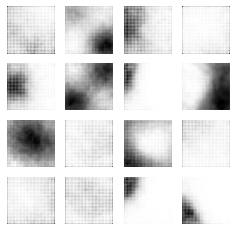

Epoch: 47, Test set ELBO: -849.0050048828125, time elapse for current epoch: 6.457898139953613


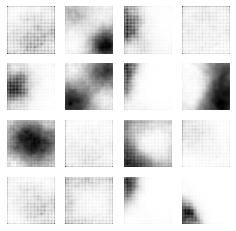

Epoch: 48, Test set ELBO: -848.9508666992188, time elapse for current epoch: 6.448030471801758


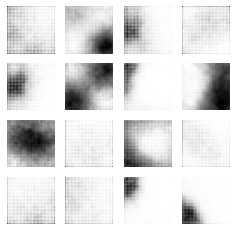

Epoch: 49, Test set ELBO: -849.7791748046875, time elapse for current epoch: 6.441129922866821


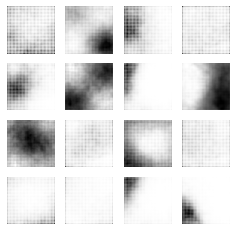

Epoch: 50, Test set ELBO: -848.9313354492188, time elapse for current epoch: 6.442389726638794


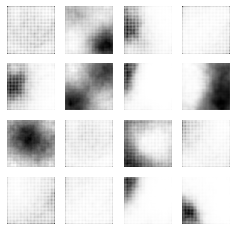

In [ ]:
with tf.device("/gpu:0"):
  generate_and_save_images(model, 0, test_sample)

  for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
      train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = keras.metrics.Mean()
    for test_x in test_dataset:
      loss(compute_loss(model, test_x))
    elbo = -loss.result()
    # display.clear_output(wait = False)
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
          .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

In [ ]:
model.save_weights("VAE_weights.h5")

In [ ]:
# Loading the model

NN_model = keras.models.load_model('/content/drive/MyDrive/Local_Backup/Codes_WSL/drive_before_vae.h5')

# saved_model = tensorflow.keras.models.load_model('VAE.h5')

In [ ]:
vae_train_output = list()

for train_sample in train_dataset:
  mean, logvar = model.encode(train_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  vae_train_output.append(predictions)
print(type(vae_train_output[0]))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
vae_test_output = list()

for test_sample in test_dataset:
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  vae_test_output.append(predictions)
print(type(vae_test_output[0]))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

m = [
    'acc', 
    tf.keras.metrics.Precision(), 
    tf.keras.metrics.Recall(), 
    tf.keras.metrics.AUC()
    ]

# opt = Adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad =  False)
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
NN_model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = m)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vae_test_output[0]

<tf.Tensor: shape=(64, 64, 64, 1), dtype=float32, numpy=
array([[[[0.95471466],
         [0.97222894],
         [0.9779869 ],
         ...,
         [0.9798346 ],
         [0.981834  ],
         [0.9589148 ]],

        [[0.97302455],
         [0.9831619 ],
         [0.98638654],
         ...,
         [0.98956597],
         [0.9908551 ],
         [0.9766441 ]],

        [[0.97769356],
         [0.9853447 ],
         [0.9861056 ],
         ...,
         [0.9896041 ],
         [0.9910178 ],
         [0.98081976]],

        ...,

        [[0.9073577 ],
         [0.9276383 ],
         [0.9214973 ],
         ...,
         [0.9788359 ],
         [0.98033065],
         [0.965973  ]],

        [[0.91801924],
         [0.93314815],
         [0.929176  ],
         ...,
         [0.97763926],
         [0.98119926],
         [0.9682294 ]],

        [[0.88104934],
         [0.9050322 ],
         [0.9042544 ],
         ...,
         [0.96333283],
         [0.9649693 ],
         [0.93250966]]],


   

In [ ]:
y_train[0]

array([0., 1.], dtype=float32)

In [ ]:
vae_train_output, y_train

([<tf.Tensor: shape=(64, 64, 64, 1), dtype=float32, numpy=
  array([[[[0.9766526 ],
           [0.9881512 ],
           [0.992386  ],
           ...,
           [0.99244386],
           [0.9925644 ],
           [0.9790992 ]],
  
          [[0.98873013],
           [0.99440706],
           [0.99654824],
           ...,
           [0.99684095],
           [0.9970065 ],
           [0.98999643]],
  
          [[0.9925861 ],
           [0.9962369 ],
           [0.99747616],
           ...,
           [0.9974842 ],
           [0.99752074],
           [0.99299353]],
  
          ...,
  
          [[0.9965467 ],
           [0.99883515],
           [0.99932885],
           ...,
           [0.99943477],
           [0.9994815 ],
           [0.99802184]],
  
          [[0.9968708 ],
           [0.99873966],
           [0.99918646],
           ...,
           [0.99942684],
           [0.99948645],
           [0.9981312 ]],
  
          [[0.98982316],
           [0.9956566 ],
           [0.99704605]

In [ ]:
# VAE Training and Testing data evaluation metrics

loss_train, accuracy_train, precision_train, recall_train, auc_train = NN_model.evaluate(vae_train_output, y_train)
loss_test, accuracy_test, precision_test, recall_test, auc_test = NN_model.evaluate(vae_test_output, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored